In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as ss
%matplotlib inline

In [2]:
PATH = "/Users/shuyi/Documents/OMSCS-master/MachineLearning/HW2/"

Problem 1: Four Peaks Problem

In [11]:
fp_rhc = 'FourPeaks/FOURPEAKS_RHC_1_LOG.txt'
df_fp_rhc = pd.read_csv(PATH+fp_rhc, sep=',')
df_fp_rhc.head()

,iterations,fitness,time,fevals
0,0,5.0,0.000196,NaN
1,10,5.0,0.000164,NaN
2,20,5.0,0.000076,NaN
3,30,5.0,0.000139,NaN
4,40,5.0,0.000077,NaN


In [12]:
fp_sa35 = 'FourPeaks/FOURPEAKS_SA0.35_1_LOG.txt'
df_fp_sa = pd.read_csv(PATH+fp_sa35, sep=',')
df_fp_sa.head()

,iterations,fitness,time,fevals
0,0,0.0,0.000025,NaN
1,10,0.0,0.000027,NaN
2,20,0.0,0.000012,NaN
3,30,0.0,0.000011,NaN
4,40,0.0,0.000010,NaN


In [13]:
fp_mc = 'FourPeaks/FOURPEAKS_MIMIC100_50_0.7_1_LOG.txt'
df_fp_mc = pd.read_csv(PATH+fp_mc, sep=',')
df_fp_mc.head()

,iterations,fitness,time,fevals
0,0,12.0,0.080657,NaN
1,10,12.0,0.079738,NaN
2,20,10.0,0.081163,NaN
3,30,10.0,0.080968,NaN
4,40,10.0,0.074642,NaN


In [14]:
fp_ga = 'FourPeaks/FOURPEAKS_GA100_50_50_1_LOG.txt'
df_fp_ga = pd.read_csv(PATH+fp_ga, sep=',')
df_fp_ga.head()

,iterations,fitness,time,fevals
0,0,9.0,0.005207,NaN
1,10,15.0,0.001780,NaN
2,20,15.0,0.002567,NaN
3,30,18.0,0.002704,NaN
4,40,18.0,0.002622,NaN


Text(0.5,0,'Iterations')

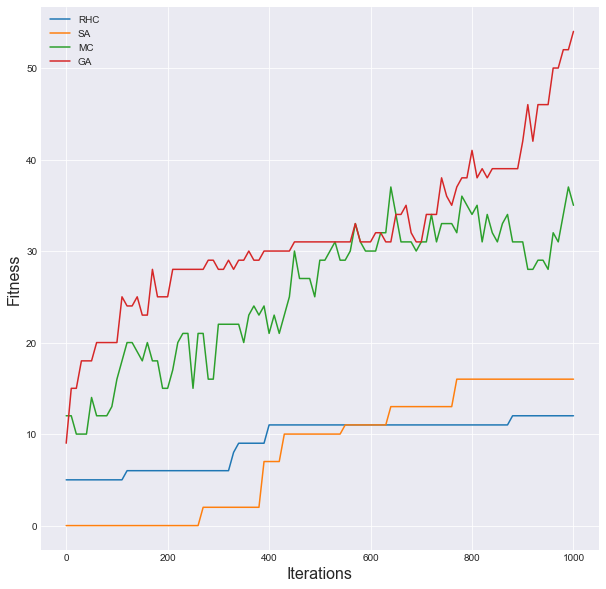

In [22]:
# convergence 
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 10))    
plt.plot(df_fp_rhc['iterations'], df_fp_rhc['fitness'],label="RHC", markevery=100)
plt.plot(df_fp_sa['iterations'], df_fp_sa['fitness'], label="SA", markevery=100)
plt.plot(df_fp_mc['iterations'], df_fp_mc['fitness'], label="MC", markevery=100)
plt.plot(df_fp_ga['iterations'], df_fp_ga['fitness'], label="GA",markevery=100)
plt.legend();
plt.ylabel("Fitness", fontsize=16)
plt.xlabel("Iterations", fontsize=16)


In [33]:
# sample size vs fitness
df_fp_n_rhc = pd.read_csv(PATH+'FourPeaks/FOURPEAKS_RHC_LOG.txt', sep=',')
df_fp_n_sa = pd.read_csv(PATH+'FourPeaks/FOURPEAKS_SA_LOG.txt', sep=',')
df_fp_n_mc = pd.read_csv(PATH+'FourPeaks/FOURPEAKS_MIMIC_LOG.txt', sep=',')
df_fp_n_ga = pd.read_csv(PATH+'FourPeaks/FOURPEAKS_GA_LOG.txt', sep=',')

In [47]:
df_fp_n_mc

,100,34.0,7.321488808
0,200,36.0,26.745424
1,300,36.0,62.692854
2,400,31.0,119.196026
3,500,27.0,197.634740
4,600,37.0,314.507051
5,700,24.0,447.521525
6,800,39.0,571.166202
7,900,36.0,781.206610
8,1000,34.0,989.140270
9,1100,32.0,1224.664816


/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  """
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  if __name__ == '__main__':
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  from ipykernel import kernelapp as app
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


Text(0.5,0,'N: length of vector')

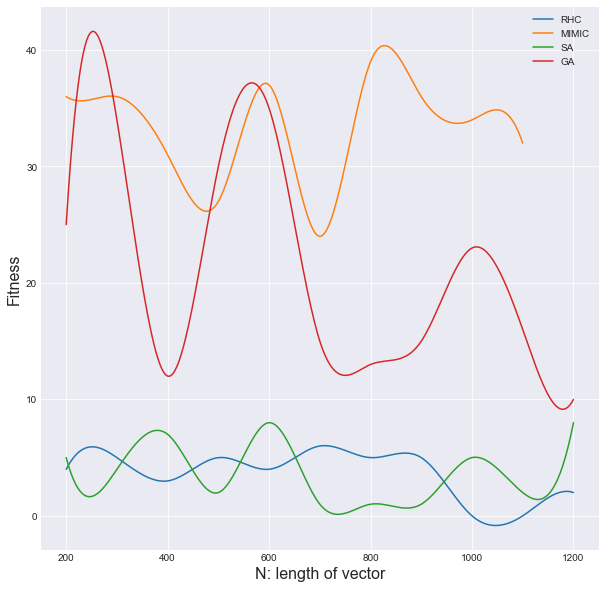

In [45]:
plt.figure(figsize=(10, 10)) 
sns.set_style("darkgrid")
from scipy.interpolate import spline
xnew = np.linspace(df_fp_n_rhc['sample'][:11].min(),df_fp_n_rhc['sample'][:11].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_fp_n_rhc['sample'][:11], df_fp_n_rhc['fitness'][:11],xnew)
plt.plot(xnew,power_smooth, label="RHC")
#plt.plot(df_fp_n_rhc['sample'][:11], df_fp_n_rhc['fitness'][:11], label="RHC")
xnew = np.linspace(df_fp_n_mc['100'].min(),df_fp_n_mc['100'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_fp_n_mc['100'], df_fp_n_mc['34.0'],xnew)
plt.plot(xnew,power_smooth, label="MIMIC")

#plt.plot(df_fp_n_mc['100'], df_fp_n_mc['34.0'], label="MIMIC")

xnew = np.linspace(df_fp_n_sa['sample'][:11].min(),df_fp_n_sa['sample'][:11].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_fp_n_sa['sample'][:11], df_fp_n_sa['fitness'][:11],xnew)
plt.plot(xnew,power_smooth, label="SA")

#plt.plot(df_fp_n_sa['sample'][:11], df_fp_n_sa['fitness'][:11],label="SA")

xnew = np.linspace(df_fp_n_ga['sample'][:11].min(),df_fp_n_ga['sample'][:11].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_fp_n_ga['sample'][:11], df_fp_n_ga['fitness'][:11],xnew)
plt.plot(xnew,power_smooth, label="GA")

#plt.plot(df_fp_n_ga['sample'][:11], df_fp_n_ga['fitness'][:11], label="GA")
plt.legend()
plt.ylabel("Fitness", fontsize=16)
plt.xlabel("N: length of vector", fontsize=16)

/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  app.launch_new_instance()
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


Text(0.5,0,'N: length of vector')

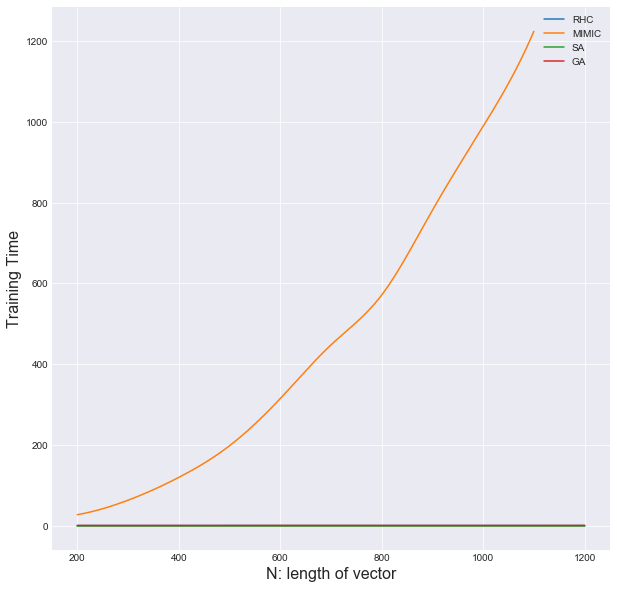

In [48]:
# training time 
plt.figure(figsize=(10, 10)) 
sns.set_style("darkgrid")
from scipy.interpolate import spline
xnew = np.linspace(df_fp_n_rhc['sample'][:11].min(),df_fp_n_rhc['sample'][:11].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_fp_n_rhc['sample'][:11], df_fp_n_rhc['time'][:11],xnew)
plt.plot(xnew,power_smooth, label="RHC")
#plt.plot(df_fp_n_rhc['sample'][:11], df_fp_n_rhc['fitness'][:11], label="RHC")
xnew = np.linspace(df_fp_n_mc['100'].min(),df_fp_n_mc['100'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_fp_n_mc['100'], df_fp_n_mc['7.321488808'],xnew)
plt.plot(xnew,power_smooth, label="MIMIC")

#plt.plot(df_fp_n_mc['100'], df_fp_n_mc['34.0'], label="MIMIC")

xnew = np.linspace(df_fp_n_sa['sample'][:11].min(),df_fp_n_sa['sample'][:11].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_fp_n_sa['sample'][:11], df_fp_n_sa['time'][:11],xnew)
plt.plot(xnew,power_smooth, label="SA")

#plt.plot(df_fp_n_sa['sample'][:11], df_fp_n_sa['fitness'][:11],label="SA")

xnew = np.linspace(df_fp_n_ga['sample'][:11].min(),df_fp_n_ga['sample'][:11].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_fp_n_ga['sample'][:11], df_fp_n_ga['time'][:11],xnew)
plt.plot(xnew,power_smooth, label="GA")

#plt.plot(df_fp_n_ga['sample'][:11], df_fp_n_ga['fitness'][:11], label="GA")
plt.legend()
plt.ylabel("Training Time", fontsize=16)
plt.xlabel("N: length of vector", fontsize=16)



/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  """
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


Text(0.5,0,'N: length of vector')

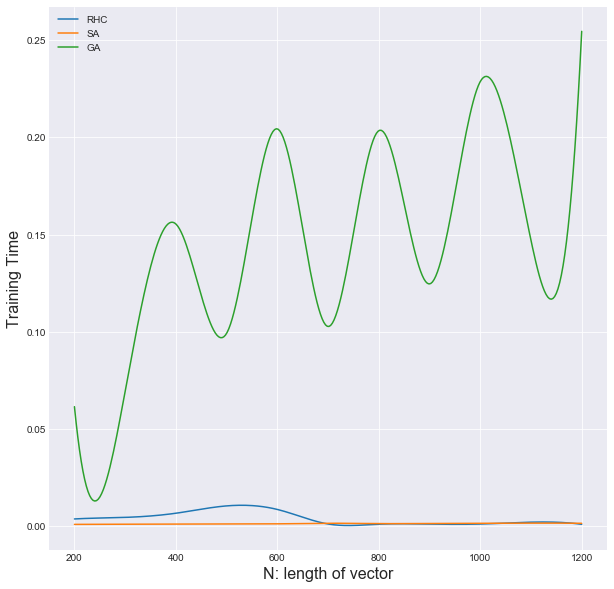

In [50]:
plt.figure(figsize=(10, 10)) 
sns.set_style("darkgrid")
from scipy.interpolate import spline
xnew = np.linspace(df_fp_n_rhc['sample'][:11].min(),df_fp_n_rhc['sample'][:11].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_fp_n_rhc['sample'][:11], df_fp_n_rhc['time'][:11],xnew)
plt.plot(xnew,power_smooth, label="RHC")

#plt.plot(df_fp_n_mc['100'], df_fp_n_mc['34.0'], label="MIMIC")

xnew = np.linspace(df_fp_n_sa['sample'][:11].min(),df_fp_n_sa['sample'][:11].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_fp_n_sa['sample'][:11], df_fp_n_sa['time'][:11],xnew)
plt.plot(xnew,power_smooth, label="SA")

#plt.plot(df_fp_n_sa['sample'][:11], df_fp_n_sa['fitness'][:11],label="SA")

xnew = np.linspace(df_fp_n_ga['sample'][:11].min(),df_fp_n_ga['sample'][:11].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_fp_n_ga['sample'][:11], df_fp_n_ga['time'][:11],xnew)
plt.plot(xnew,power_smooth, label="GA")

#plt.plot(df_fp_n_ga['sample'][:11], df_fp_n_ga['fitness'][:11], label="GA")
plt.legend()
plt.ylabel("Training Time", fontsize=16)
plt.xlabel("N: length of vector", fontsize=16)

2. TSP problem

In [24]:
tsp_rhc = 'TSP/TSP_RHC_1_LOG.txt'
df_tsp_rhc = pd.read_csv(PATH+tsp_rhc, sep=',')
df_tsp_rhc.head()

,iterations,fitness,time,fevals
0,0,0.020485,0.000359,11
1,10,0.021409,0.000505,21
2,20,0.022068,0.000664,31
3,30,0.023093,0.000808,41
4,40,0.023313,0.000949,51


In [29]:
# SA 15
tsp_sa = 'TSP/TSP_SA0.15_1_LOG.txt'
df_tsp_sa = pd.read_csv(PATH+tsp_sa, sep=',')
df_tsp_sa.head()

,iterations,fitness,time,fevals
0,0,0.019718,0.000066,11
1,10,0.018991,0.000101,21
2,20,0.019902,0.000461,31
3,30,0.020063,0.000506,41
4,40,0.020443,0.000545,51


In [30]:
# GA 100 50 10
tsp_ga = 'TSP/TSP_GA100_50_10_1_LOG.txt'
df_tsp_ga = pd.read_csv(PATH+tsp_ga, sep=',')
df_tsp_ga.head()

,iterations,fitness,time,fevals
0,0,0.033959,0.003924,654
1,10,0.045564,0.007265,1197
2,20,0.055326,0.010544,1745
3,30,0.054368,0.013661,2298
4,40,0.062822,0.016908,2842


In [31]:
# MIMIC
tsp_mc = 'TSP/TSP_MIMIC100_50_0.7_1_LOG.txt'
df_tsp_mc = pd.read_csv(PATH+tsp_mc, sep=',')
df_tsp_mc.head()

,iterations,fitness,time,fevals
0,0,0.020513,1.611676,1000
1,10,0.021014,3.251356,2100
2,20,0.021514,4.907624,3200
3,30,0.020928,6.497657,4300
4,40,0.019987,8.112039,5400


Text(0.5,0,'Iterations')

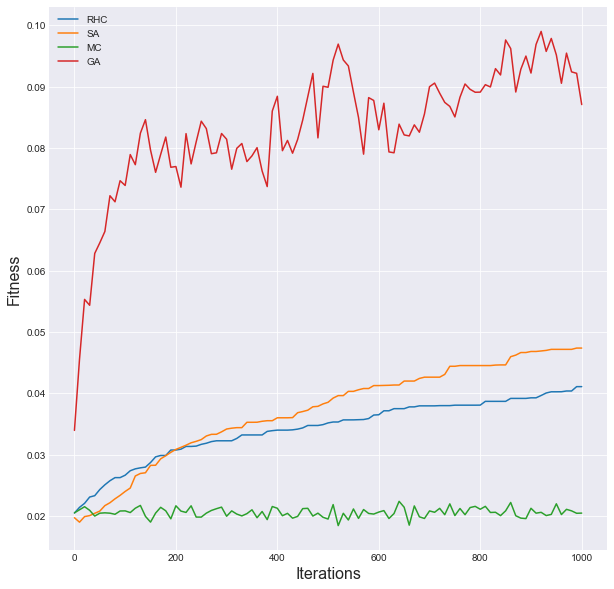

In [32]:
# convergence 
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 10))    
plt.plot(df_tsp_rhc['iterations'], df_tsp_rhc['fitness'],label="RHC", markevery=100)
plt.plot(df_tsp_sa['iterations'], df_tsp_sa['fitness'], label="SA", markevery=100)
plt.plot(df_tsp_mc['iterations'], df_tsp_mc['fitness'], label="MC", markevery=100)
plt.plot(df_tsp_ga['iterations'], df_tsp_ga['fitness'], label="GA",markevery=100)
plt.legend();
plt.ylabel("Fitness", fontsize=16)
plt.xlabel("Iterations", fontsize=16)

In [51]:
# sample size vs fitness
df_tsp_n_rhc = pd.read_csv(PATH+'TSP/TSP_RHC_LOG.txt', sep=',')
df_tsp_n_sa = pd.read_csv(PATH+'TSP/TSP_SA_LOG.txt', sep=',')
df_tsp_n_mc = pd.read_csv(PATH+'TSP/TSP_MIMIC_LOG.txt', sep=',')
df_tsp_n_ga = pd.read_csv(PATH+'TSP/TSP_GA_LOG.txt', sep=',')

In [53]:
df_tsp_n_ga = df_tsp_n_ga.iloc[1:]
df_tsp_n_ga

,sample,fitness,time
1,110.0,0.084334,0.296945
2,120.0,0.091223,0.370579
3,130.0,0.081553,0.373189
4,140.0,0.064450,0.431720
5,150.0,0.082836,0.409811
6,160.0,0.071187,0.428608
7,170.0,0.061052,0.516927
8,180.0,0.065886,0.490977
9,190.0,0.062544,0.493364
10,200.0,0.056997,0.573921


In [55]:
df_tsp_n_rhc = df_tsp_n_rhc.iloc[1:]
df_tsp_n_rhc

,sample,fitness,time
1,110.0,0.035352,0.018076
2,120.0,0.034772,0.005139
3,130.0,0.029276,0.004391
4,140.0,0.027617,0.002759
5,150.0,0.026744,0.003819
6,160.0,0.021382,0.001196
7,170.0,0.022465,0.001614
8,180.0,0.019986,0.002682
9,190.0,0.018127,0.002089
10,200.0,0.018104,0.002457


In [57]:
df_tsp_n_sa = df_tsp_n_sa.iloc[1:]
df_tsp_n_sa

,sample,fitness,time
1,110.0,0.038445,0.001594
2,120.0,0.034407,0.001633
3,130.0,0.031918,0.001732
4,140.0,0.026158,0.002273
5,150.0,0.025627,0.002893
6,160.0,0.024371,0.003005
7,170.0,0.022858,0.002448
8,180.0,0.018904,0.003250
9,190.0,0.018836,0.003045
10,200.0,0.018131,0.002691


In [58]:
df_tsp_n_mc = df_tsp_n_mc.iloc[1:]
df_tsp_n_mc

,sample,fitness,time
1,110.0,0.018805,236.171646
2,120.0,0.016276,325.909335
3,130.0,0.015900,415.425295
4,140.0,0.015175,561.349843
5,150.0,0.013859,728.499907
6,160.0,0.012130,902.481526
7,170.0,0.011760,1088.764579
8,180.0,0.010851,1341.752584
9,190.0,0.010721,1660.554654
10,200.0,0.009697,2032.964056


/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  after removing the cwd from sys.path.
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


Text(0.5,0,'N: length of vector')

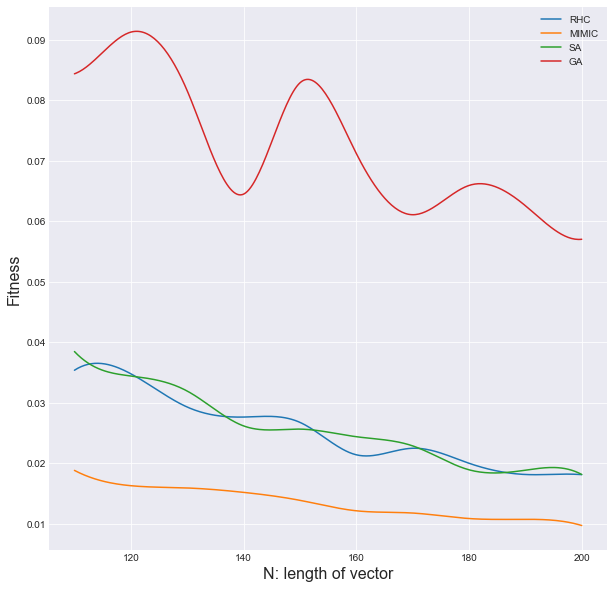

In [60]:
plt.figure(figsize=(10, 10)) 
sns.set_style("darkgrid")
xnew = np.linspace(df_tsp_n_rhc["sample"].min(),df_tsp_n_rhc['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_tsp_n_rhc['sample'], df_tsp_n_rhc['fitness'],xnew)
plt.plot(xnew,power_smooth, label="RHC")
#plt.plot(df_fp_n_rhc['sample'][:11], df_fp_n_rhc['fitness'][:11], label="RHC")
xnew = np.linspace(df_tsp_n_mc['sample'].min(),df_tsp_n_mc['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_tsp_n_mc['sample'], df_tsp_n_mc['fitness'],xnew)
plt.plot(xnew,power_smooth, label="MIMIC")

#plt.plot(df_fp_n_mc['100'], df_fp_n_mc['34.0'], label="MIMIC")

xnew = np.linspace(df_tsp_n_sa['sample'].min(),df_tsp_n_sa['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_tsp_n_sa['sample'], df_tsp_n_sa['fitness'],xnew)
plt.plot(xnew,power_smooth, label="SA")

#plt.plot(df_fp_n_sa['sample'][:11], df_fp_n_sa['fitness'][:11],label="SA")

xnew = np.linspace(df_tsp_n_ga['sample'].min(),df_tsp_n_ga['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_tsp_n_ga['sample'], df_tsp_n_ga['fitness'],xnew)
plt.plot(xnew,power_smooth, label="GA")

#plt.plot(df_fp_n_ga['sample'][:11], df_fp_n_ga['fitness'][:11], label="GA")
plt.legend()
plt.ylabel("Fitness", fontsize=16)
plt.xlabel("N: length of vector", fontsize=16)

/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  app.launch_new_instance()
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


Text(0.5,0,'N: length of vector')

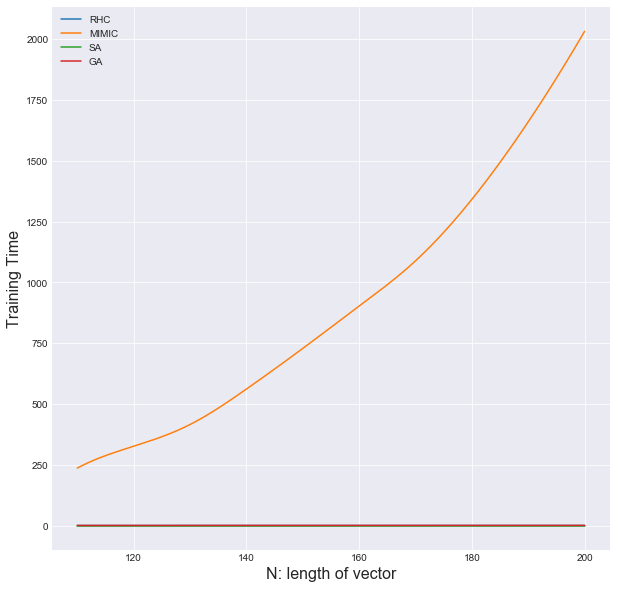

In [62]:
# training time 
plt.figure(figsize=(10, 10)) 
sns.set_style("darkgrid")

xnew = np.linspace(df_tsp_n_rhc['sample'].min(),df_tsp_n_rhc['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_tsp_n_rhc['sample'], df_tsp_n_rhc['time'],xnew)
plt.plot(xnew,power_smooth, label="RHC")
#plt.plot(df_fp_n_rhc['sample'][:11], df_fp_n_rhc['fitness'][:11], label="RHC")
xnew = np.linspace(df_tsp_n_mc['sample'].min(),df_tsp_n_mc['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_tsp_n_mc['sample'], df_tsp_n_mc['time'],xnew)
plt.plot(xnew,power_smooth, label="MIMIC")

#plt.plot(df_fp_n_mc['100'], df_fp_n_mc['34.0'], label="MIMIC")

xnew = np.linspace(df_tsp_n_sa['sample'].min(),df_tsp_n_sa['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_tsp_n_sa['sample'], df_tsp_n_sa['time'],xnew)
plt.plot(xnew,power_smooth, label="SA")

#plt.plot(df_fp_n_sa['sample'][:11], df_fp_n_sa['fitness'][:11],label="SA")

xnew = np.linspace(df_tsp_n_ga['sample'].min(),df_tsp_n_ga['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_tsp_n_ga['sample'], df_tsp_n_ga['time'],xnew)
plt.plot(xnew,power_smooth, label="GA")

#plt.plot(df_fp_n_ga['sample'][:11], df_fp_n_ga['fitness'][:11], label="GA")
plt.legend()
plt.ylabel("Training Time", fontsize=16)
plt.xlabel("N: length of vector", fontsize=16)


/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


Text(0.5,0,'N: length of vector')

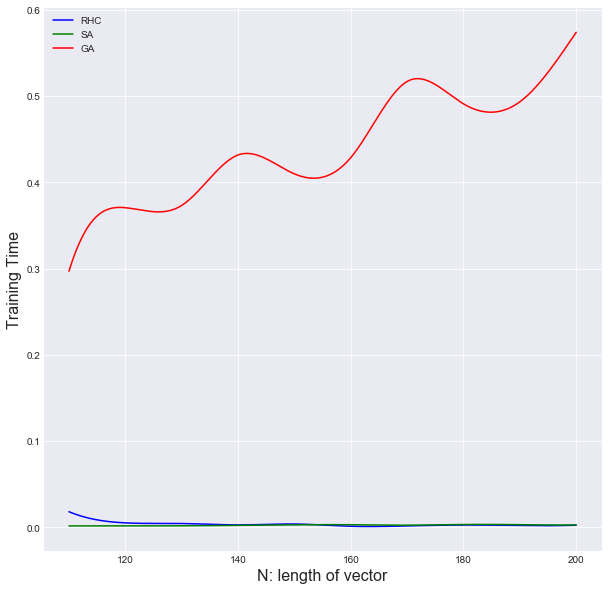

In [63]:
# training time 
plt.figure(figsize=(10, 10)) 
sns.set_style("darkgrid")

xnew = np.linspace(df_tsp_n_rhc['sample'].min(),df_tsp_n_rhc['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_tsp_n_rhc['sample'], df_tsp_n_rhc['time'],xnew)
plt.plot(xnew,power_smooth, label="RHC", color = 'b')
#plt.plot(df_fp_n_rhc['sample'][:11], df_fp_n_rhc['fitness'][:11], label="RHC")

xnew = np.linspace(df_tsp_n_sa['sample'].min(),df_tsp_n_sa['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_tsp_n_sa['sample'], df_tsp_n_sa['time'],xnew)
plt.plot(xnew,power_smooth, label="SA", color = 'g')

#plt.plot(df_fp_n_sa['sample'][:11], df_fp_n_sa['fitness'][:11],label="SA")

xnew = np.linspace(df_tsp_n_ga['sample'].min(),df_tsp_n_ga['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_tsp_n_ga['sample'], df_tsp_n_ga['time'],xnew)
plt.plot(xnew,power_smooth, label="GA", color = 'r')

#plt.plot(df_fp_n_ga['sample'][:11], df_fp_n_ga['fitness'][:11], label="GA")
plt.legend()
plt.ylabel("Training Time", fontsize=16)
plt.xlabel("N: length of vector", fontsize=16)


In [64]:
# sample size vs fitness
df_ks_n_rhc = pd.read_csv(PATH+'Knapsack/KS_RHC_LOG.txt', sep=',')
df_ks_n_sa = pd.read_csv(PATH+'Knapsack/KS_SA_LOG.txt', sep=',')
df_ks_n_mc = pd.read_csv(PATH+'Knapsack/KS_MIMIC_LOG.txt', sep=',')
df_ks_n_ga = pd.read_csv(PATH+'Knapsack/KS_GA_LOG.txt', sep=',')

/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  after removing the cwd from sys.path.
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


Text(0.5,0,'N: length of vector')

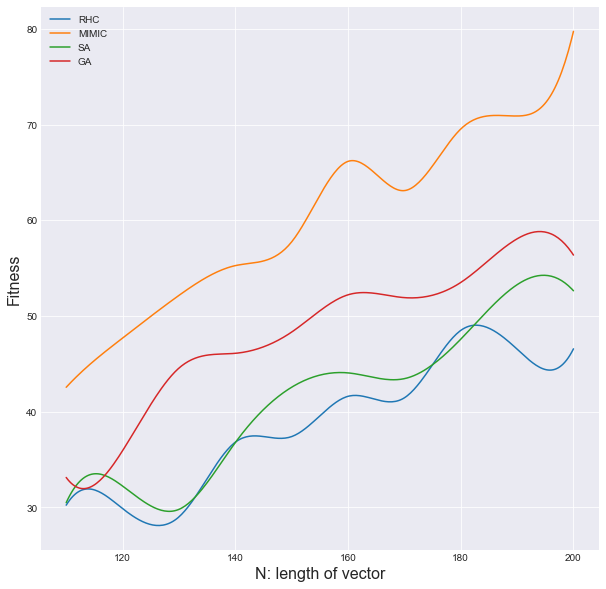

In [65]:
plt.figure(figsize=(10, 10)) 
sns.set_style("darkgrid")
xnew = np.linspace(df_ks_n_rhc["sample"].min(),df_ks_n_rhc['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_ks_n_rhc['sample'], df_ks_n_rhc['fitness'],xnew)
plt.plot(xnew,power_smooth, label="RHC")
#plt.plot(df_fp_n_rhc['sample'][:11], df_fp_n_rhc['fitness'][:11], label="RHC")
xnew = np.linspace(df_ks_n_mc['sample'].min(),df_ks_n_mc['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_ks_n_mc['sample'], df_ks_n_mc['fitness'],xnew)
plt.plot(xnew,power_smooth, label="MIMIC")

#plt.plot(df_fp_n_mc['100'], df_fp_n_mc['34.0'], label="MIMIC")

xnew = np.linspace(df_ks_n_sa['sample'].min(),df_ks_n_sa['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_ks_n_sa['sample'], df_ks_n_sa['fitness'],xnew)
plt.plot(xnew,power_smooth, label="SA")

#plt.plot(df_fp_n_sa['sample'][:11], df_fp_n_sa['fitness'][:11],label="SA")

xnew = np.linspace(df_ks_n_ga['sample'].min(),df_ks_n_ga['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_ks_n_ga['sample'], df_ks_n_ga['fitness'],xnew)
plt.plot(xnew,power_smooth, label="GA")

#plt.plot(df_fp_n_ga['sample'][:11], df_fp_n_ga['fitness'][:11], label="GA")
plt.legend()
plt.ylabel("Fitness", fontsize=16)
plt.xlabel("N: length of vector", fontsize=16)

/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  app.launch_new_instance()
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


Text(0.5,0,'N: length of vector')

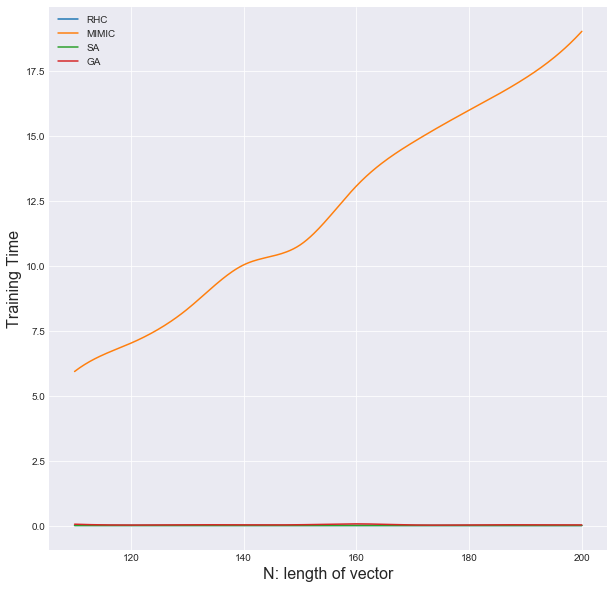

In [66]:
# training time 
plt.figure(figsize=(10, 10)) 
sns.set_style("darkgrid")

xnew = np.linspace(df_ks_n_rhc['sample'].min(),df_ks_n_rhc['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_ks_n_rhc['sample'], df_ks_n_rhc['time'],xnew)
plt.plot(xnew,power_smooth, label="RHC")
#plt.plot(df_fp_n_rhc['sample'][:11], df_fp_n_rhc['fitness'][:11], label="RHC")
xnew = np.linspace(df_ks_n_mc['sample'].min(),df_ks_n_mc['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_ks_n_mc['sample'], df_ks_n_mc['time'],xnew)
plt.plot(xnew,power_smooth, label="MIMIC")

#plt.plot(df_fp_n_mc['100'], df_fp_n_mc['34.0'], label="MIMIC")

xnew = np.linspace(df_ks_n_sa['sample'].min(),df_ks_n_sa['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_ks_n_sa['sample'], df_ks_n_sa['time'],xnew)
plt.plot(xnew,power_smooth, label="SA")

#plt.plot(df_fp_n_sa['sample'][:11], df_fp_n_sa['fitness'][:11],label="SA")

xnew = np.linspace(df_ks_n_ga['sample'].min(),df_ks_n_ga['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_ks_n_ga['sample'], df_ks_n_ga['time'],xnew)
plt.plot(xnew,power_smooth, label="GA")

#plt.plot(df_fp_n_ga['sample'][:11], df_fp_n_ga['fitness'][:11], label="GA")
plt.legend()
plt.ylabel("Training Time", fontsize=16)
plt.xlabel("N: length of vector", fontsize=16)

/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


Text(0.5,0,'N: length of vector')

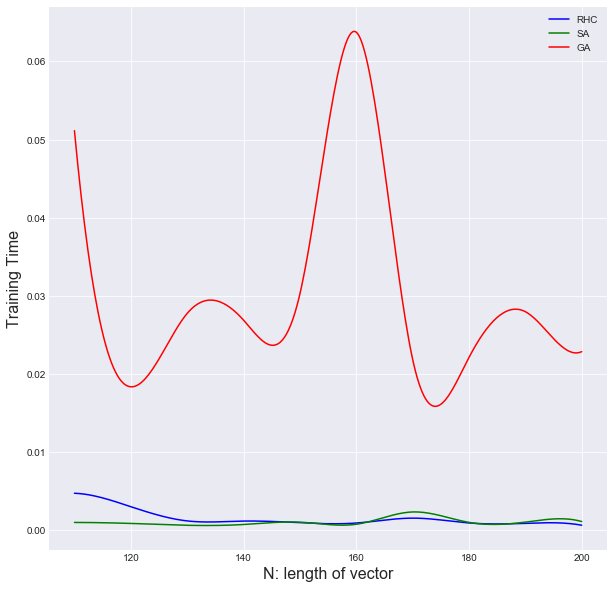

In [67]:
# training time 
plt.figure(figsize=(10, 10)) 
sns.set_style("darkgrid")

xnew = np.linspace(df_ks_n_rhc['sample'].min(),df_ks_n_rhc['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_ks_n_rhc['sample'], df_ks_n_rhc['time'],xnew)
plt.plot(xnew,power_smooth, label="RHC", color = 'b')
#plt.plot(df_fp_n_rhc['sample'][:11], df_fp_n_rhc['fitness'][:11], label="RHC")

xnew = np.linspace(df_ks_n_sa['sample'].min(),df_ks_n_sa['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_ks_n_sa['sample'], df_ks_n_sa['time'],xnew)
plt.plot(xnew,power_smooth, label="SA", color = 'g')

#plt.plot(df_fp_n_sa['sample'][:11], df_fp_n_sa['fitness'][:11],label="SA")

xnew = np.linspace(df_ks_n_ga['sample'].min(),df_ks_n_ga['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_ks_n_ga['sample'], df_ks_n_ga['time'],xnew)
plt.plot(xnew,power_smooth, label="GA", color = 'r')

#plt.plot(df_fp_n_ga['sample'][:11], df_fp_n_ga['fitness'][:11], label="GA")
plt.legend()
plt.ylabel("Training Time", fontsize=16)
plt.xlabel("N: length of vector", fontsize=16)


In [73]:
df_time_ratio = pd.DataFrame({'Algoritm':['GA', 'MIMIC']})

In [69]:
'Problem':['TSP', 'FourPeaks', 'KS'] ,  
' Ratio':[] }
[df_tsp_mc['time']/df_tsp_ga['time'], df_tsp_mc['time']/df_tsp_ga['time']

{' Ratio': [],
 'Algoritm': ['GA', 'MIMIC'],
 'Problem': ['TSP', 'FourPeaks', 'KS']}

In [74]:
df_time_ratio

,Algoritm
0,GA
1,MIMIC


/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  
/Users/shuyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,0,'N: length of vector')

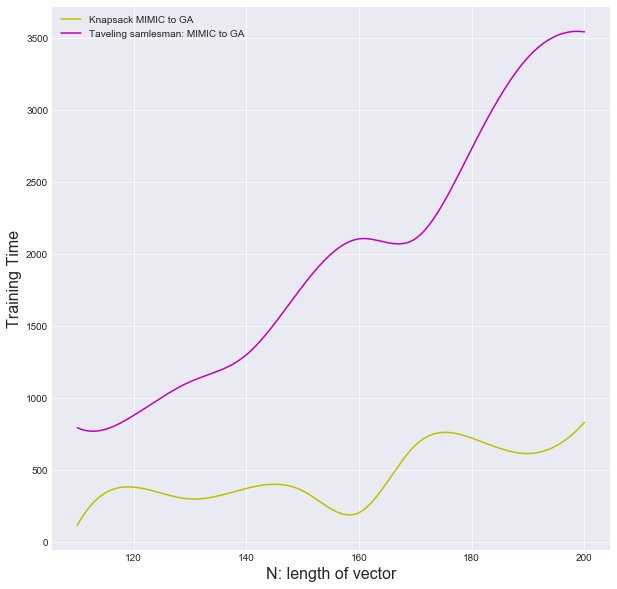

In [82]:
# training time 
plt.figure(figsize=(10, 10)) 
sns.set_style("darkgrid")

xnew = np.linspace(df_ks_n_mc['sample'].min(),df_ks_n_mc['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_ks_n_mc['sample'], df_ks_n_mc['time']/df_ks_n_ga['time'],xnew)
plt.plot(xnew,power_smooth, label="Knapsack MIMIC to GA", color = 'y')
#plt.plot(df_fp_n_rhc['sample'][:11], df_fp_n_rhc['fitness'][:11], label="RHC")

xnew = np.linspace(df_tsp_n_mc['sample'].min(),df_tsp_n_mc['sample'].max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(df_tsp_n_mc['sample'], df_tsp_n_mc['time']/df_tsp_n_ga['time'],xnew)
plt.plot(xnew,power_smooth, label="Taveling samlesman: MIMIC to GA", color = 'm')
#
#plt.plot(df_fp_n_sa['sample'][:11], df_fp_n_sa['fitness'][:11],label="SA")

#plt.plot(df_fp_n_ga['sample'][:11], df_fp_n_ga['fitness'][:11], label="GA")
plt.legend()
plt.ylabel("Training Time", fontsize=16)
plt.xlabel("N: length of vector", fontsize=16)


In [80]:
df_fp_n_ga

,sample,fitness,time
0,200,25.0,0.061467
1,300,34.0,0.069501
2,400,12.0,0.155446
3,500,30.0,0.099204
4,600,35.0,0.204394
5,700,15.0,0.102702
6,800,13.0,0.203465
7,900,15.0,0.124619
8,1000,23.0,0.228726
9,1100,16.0,0.147071
